# 逻辑回归

## 数据预处理

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
path = 'ex2data1.txt'
data = pd.read_csv(path, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


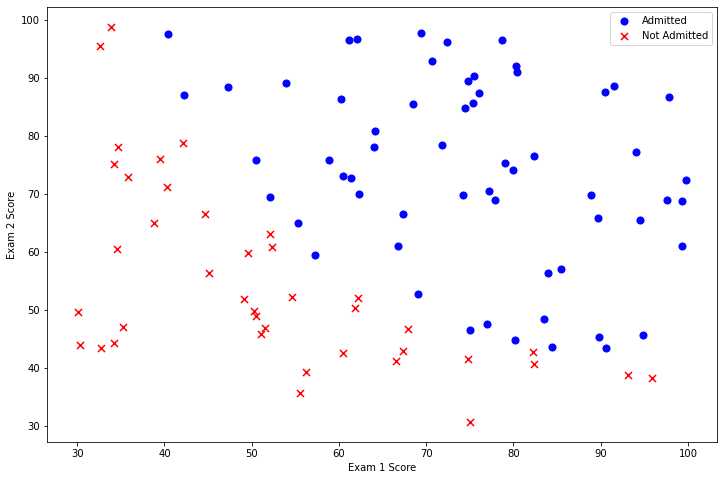

In [65]:
positive = data[data['Admitted'].isin([1])]
nagative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(nagative['Exam1'], nagative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

## sigmoid function

In [66]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
    

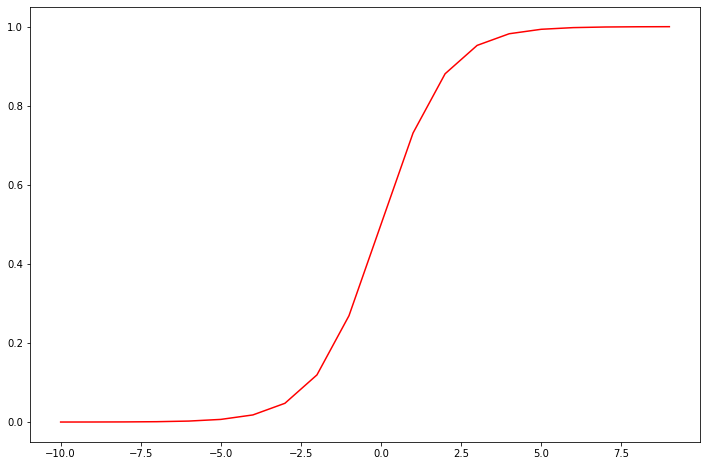

In [67]:
nums = np.arange(-10, 10, step=1)

fix, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

## Cost function

In [68]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [69]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1] #前面的参数
y = data.iloc[:,cols-1:cols] #最后结果
# print(X)
# print(y)

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [70]:
theta

array([0., 0., 0.])

In [71]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [72]:
cost(theta, X, y)

0.6931471805599453

## gradient descent

In [78]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1]) #参数个数，将theta变成数组再求行数
    grad = np.zeros(parameters) #构造零矩阵
    
    error = sigmoid(X * theta.T) - y #计算损失

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X) #梯度

    return grad

注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情

In [79]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。

In [80]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result #明明是个矩阵，为什么输出值只是一个数？？

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [81]:
cost(result[0], X, y)

0.20349770158947425

In [ ]:
## evaluating logistic regression

In [82]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >=0.5 else 0 for x in probability]
    

In [83]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


accuracy = 89%
